<a href="https://colab.research.google.com/github/Laragb21/PRA3024_BigDataPhysics/blob/main/LHCb_2026_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 3!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.


![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) through a python package for that - [upROOT](https://pypi.org/project/uproot/) and download some datafiles into your environment!.

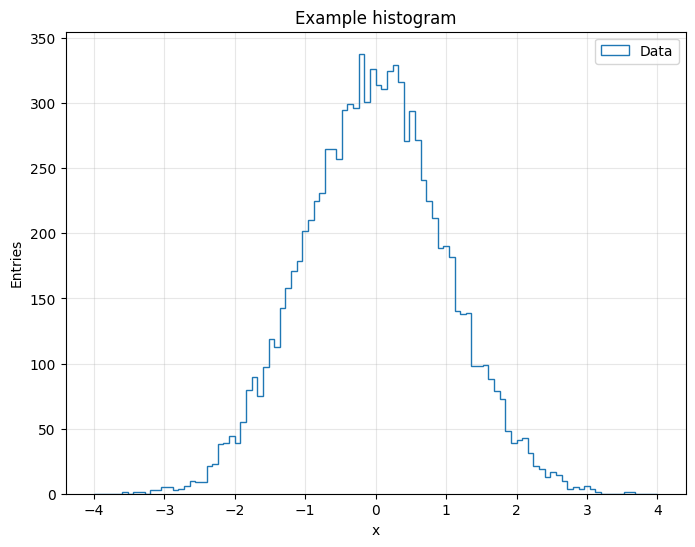

In [1]:
# We use NumPy for numerical work and random numbers
# Matplotlib is used for plotting as before
import numpy as np
import matplotlib.pyplot as plt

# SciPy provides fitting tools, similar to ROOT's Fit("gaus")
from scipy.stats import norm


# ------------------------------------------------------------
# 1. Generate Gaussian-distributed random numbers
#    (equivalent to h.FillRandom("gaus"))
# ------------------------------------------------------------

# Mean (mu) and standard deviation (sigma) of the Gaussian
mu = 0.0
sigma = 1.0

# Number of entries to generate (like number of fills)
n_entries = 10000

# Generate random data
data = np.random.normal(loc=mu, scale=sigma, size=n_entries)


# ------------------------------------------------------------
# 2. Create a histogram (We will do this alot today...))
# ------------------------------------------------------------

# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -4, 4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)


# ------------------------------------------------------------
# 3. Labels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot
plt.show()



All being well - this should give no errors and we should have some kind of Gaussian distribution above.

We now want to do two things, install uproot - and get our data file from the CERN open data storage location.

This will probably be ratelimited very quickly, so you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/26553/files/6101104?module_item_id=1009080

Then upload it directly.

In [2]:
!pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.7/656.7 kB 28.3 MB/s eta 0:00:00


In [3]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2026-02-24 18:27:50--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  36.5MB/s    in 1m 44s  

2026-02-24 18:29:35 (6.11 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [4]:
import uproot

# Open the ROOT file
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

# List contents (shows us what is inside)
file.keys()

# Access the tree
tree = file["DecayTree"]
print(tree)

# Read one branch as a NumPy array
px = tree["H1_PX"].array(library="np")

px

<TTree 'DecayTree' (26 branches) at 0x7cd0dfc84e30>


array([  375.2842054 , -4985.13078543, -1265.45654435, ...,
        2606.91083928,  -294.71098895,   499.04234923])

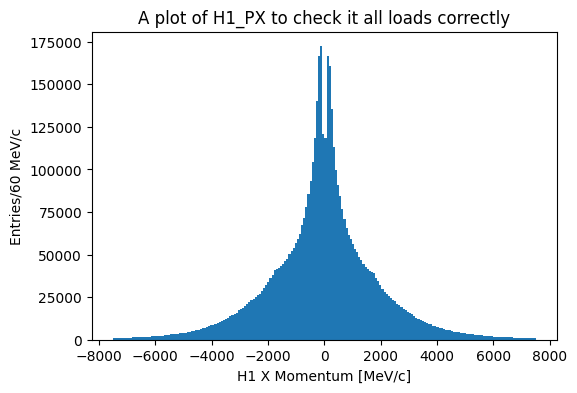

In [5]:
# now our data is an array - we can plot it :)

plt.figure(figsize=(6, 4))


#play with the variables below ...
plt.hist(
    px,
    bins=200,
    range=(-7500, 7500),
    histtype="bar"
)

#Add some labels...

plt.xlabel("H1 X Momentum [MeV/c]")
plt.ylabel("Entries/60 MeV/c")
plt.title("A plot of H1_PX to check it all loads correctly")

plt.show()

This is the point at which the setup is all working - you can proceed below if you want to look at a basic guide to fitting functions to data using numpy etc.

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2451795067.py:44: SyntaxWarning: invalid escape sequence '\m'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
/tmp/ipython-input-2451795067.py:44: SyntaxWarning: invalid escape sequence '\s'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"


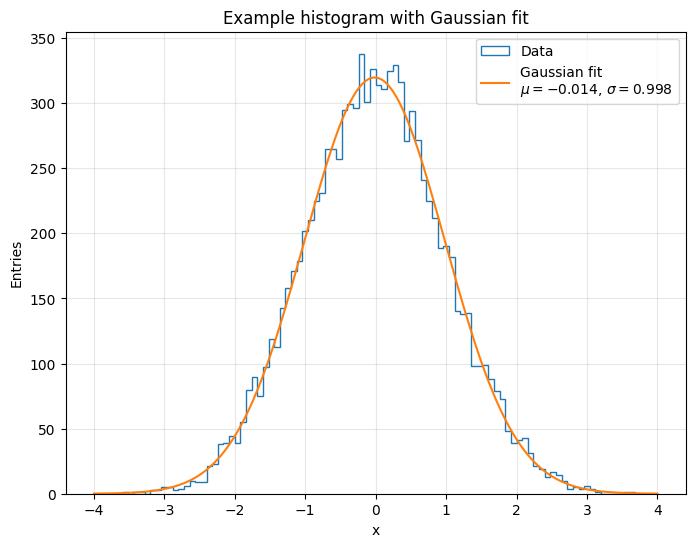

In [6]:
# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -4,4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)

# ------------------------------------------------------------
# Now we perform a Gaussian fit
# ------------------------------------------------------------

# Fit a normal distribution to the data
# norm.fit returns the fitted mean and standard deviation
fit_mu, fit_sigma = norm.fit(data)

# Create x values for drawing the fitted function
x = np.linspace(x_min, x_max, 400)

# Evaluate the fitted Gaussian probability density function
pdf = norm.pdf(x, fit_mu, fit_sigma)

# Convert PDF to expected histogram counts
# (ROOT does this internally; here we scale manually)
bin_width = (x_max - x_min) / n_bins
fit_y = pdf * n_entries * bin_width


# ------------------------------------------------------------
# Draw the fitted Gaussian on top of the histogram
# ------------------------------------------------------------

ax.plot(
    x,
    fit_y,
    label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
)


# ------------------------------------------------------------
# abels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram with Gaussian fit")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot (equivalent to c.Draw())
plt.show()


## If you are **Here** - and Chris did not make the introduction yet - it's time for a coffee - take a break and wait for instructions about how to proceed.

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [7]:
#Using Uproot, load your data file and load the variables you think are useful for this analysis - I recommend learning what your data structure is...so plotting and calculations becomes easier later.
#momentum function
def Momentum(x,y,z):
  return np.sqrt(x**2+y**2+z**2)
#accessing the H1 daughter particles momentum components
px_H1 = tree["H1_PX"].array(library="np")
py_H1 = tree["H1_PY"].array(library="np")
pz_H1 = tree["H1_PZ"].array(library="np")

px_H2 = tree["H2_PX"].array(library="np")
py_H2 = tree["H2_PY"].array(library="np")
pz_H2 = tree["H2_PZ"].array(library="np")

px_H3= tree["H3_PX"].array(library="np")
py_H3 = tree["H3_PY"].array(library="np")
pz_H3 = tree["H3_PZ"].array(library="np")

#identifiying how many events are in one section
if len(px_H1) == len(px_H2) == len(px_H3):
   print(f"there are {len(px_H3)} events in each momentum array")

#find p_tot_H1, p_tot_H2 and p_tot_H3
p_tot_H1= Momentum(px_H1,py_H1,pz_H1) #calculating the total momentum of H1
p_tot_H2= Momentum(px_H2,py_H2,pz_H2)
p_tot_H3= Momentum(px_H3,py_H3,pz_H3)

#finding the momentum of the mother particle
px_sum= px_H1+px_H2+px_H3
py_sum= py_H1+py_H2+py_H3
pz_sum= pz_H1+pz_H2+pz_H3

Ptotal_B= np.sqrt((px_sum)**2 + ((py_sum)**2) + ((pz_sum)**2)) #mother particle total momentum



there are 5135823 events in each momentum array


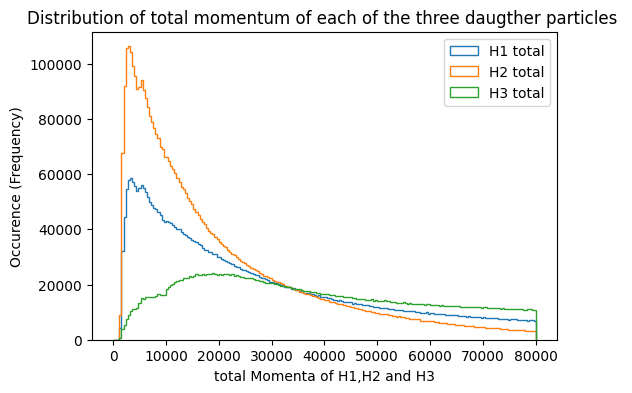

In [8]:
#Here make a plot of the Total momentum of each of the three daughters on one plot
#plot p_tot_H1, p_tot_H2, p_tot_H3

plt.figure(figsize=(6, 4))
plt.hist(p_tot_H1,bins=200,range=(0, 80000), histtype="step") #hyttype step makes the 3 graphs more distinguishable
plt.hist(p_tot_H2, bins=200,range=(0, 80000),histtype="step")
plt.hist(p_tot_H3, bins=200,range=(0, 80000),histtype="step")
plt.legend(["H1 total","H2 total","H3 total"])

plt.xlabel("total Momenta of H1,H2 and H3")
plt.ylabel("Occurence (Frequency)")
plt.title("Distribution of total momentum of each of the three daugther particles ")

plt.show()

Now plot the total momentum for the mother (M_Ptot) this about how to calculate this from the information available

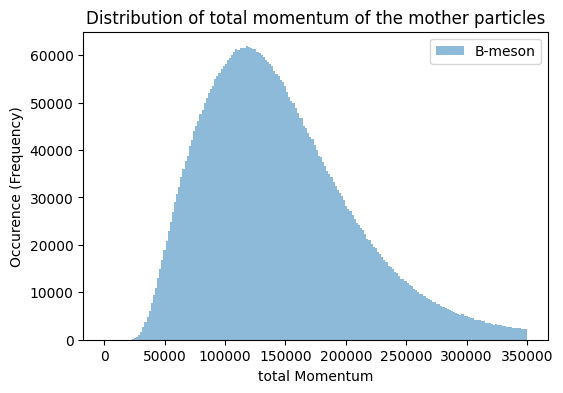

In [9]:
#use the histogram plotting tools, plot the momentum of the mother
plt.figure(figsize=(6, 4))
plt.hist(Ptotal_B,bins=200,range=(0, 350000),alpha=0.5, histtype="bar")
plt.legend(["B-meson"])

plt.xlabel("total Momentum")
plt.ylabel("Occurence (Frequency)")
plt.title("Distribution of total momentum of the mother particles")

plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - for example the number 45th entry in your array...

In [10]:
# print the 45th entry from your array(s) together with the variable name, maybe in a nice list or table.

branches = [k for k in tree.keys()] #accessing the braches and taking every key of it


for b in branches: #accessing the 45th entry and putting it into an array
  print(b, tree[b].array(library="np")[45])

B_FlightDistance 257.00205776946603
B_VertexChi2 1.865567179221614
H1_PX 420.3413896413646
H1_PY -110.66276079201207
H1_PZ 5883.766388082404
H1_ProbK 0.012183159589767456
H1_ProbPi 0.8191394209861755
H1_Charge -1
H1_IPChi2 27121.53690741779
H1_isMuon 1
H2_PX -985.6367588987478
H2_PY 630.9893539299605
H2_PZ 35342.13861801284
H2_ProbK 0.6670113801956177
H2_ProbPi 0.04563945531845093
H2_Charge 1
H2_IPChi2 13712.438218214942
H2_isMuon 0
H3_PX -6242.300384410311
H3_PY -862.2130979651508
H3_PZ 277275.49225626234
H3_ProbK 0.07501816749572754
H3_ProbPi 0.428352952003479
H3_Charge 1
H3_IPChi2 1026.12298434195
H3_isMuon 0


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

[175445.40385845 419291.57017746 194327.52631295 ...  54356.94661671
 157612.31384152 142225.72439504]


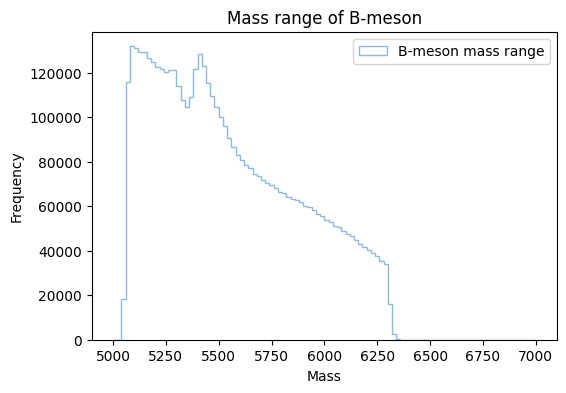

In [11]:
#momentum function
def Momentum(x,y,z):
  return np.sqrt(x**2+y**2+z**2)
#mass function
def Mass(E,p):
 return np.sqrt((E**2-p**2))
#energy funciton
def Energy(p,mk):
 return np.sqrt(p**2+mk**2)
mK = 497.677 #mass of a kaon (MeV)q

#Momenta of the daugther particles
H1_p= Momentum(px_H1,py_H1,pz_H1)
H2_p= Momentum(px_H2,py_H2,pz_H2)
H3_p= Momentum(px_H3,py_H3,pz_H3)

#the sums of the 3 daughter particles
px_sum= px_H1 + px_H2 + px_H3
py_sum= py_H1 + py_H2 + py_H3
pz_sum= pz_H1 + pz_H2 + pz_H3

#Energy of each daugther particle
E1= Energy(H1_p, mK)
E2= Energy(H2_p, mK)
E3= Energy(H3_p, mK)

Eb= E1+E2+E3 #total energy of the B-meson
print(Eb)
Mb= Mass(Eb, Ptotal_B) #in an array
plt.figure(figsize=(6, 4))
plt.hist(Mb,bins=100,range=(5000, 7000),alpha=0.5, histtype="step")
plt.legend(["B-meson mass range"])

plt.xlabel("Mass")
plt.ylabel("Frequency")
plt.title("Mass range of B-meson")

plt.show()



We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

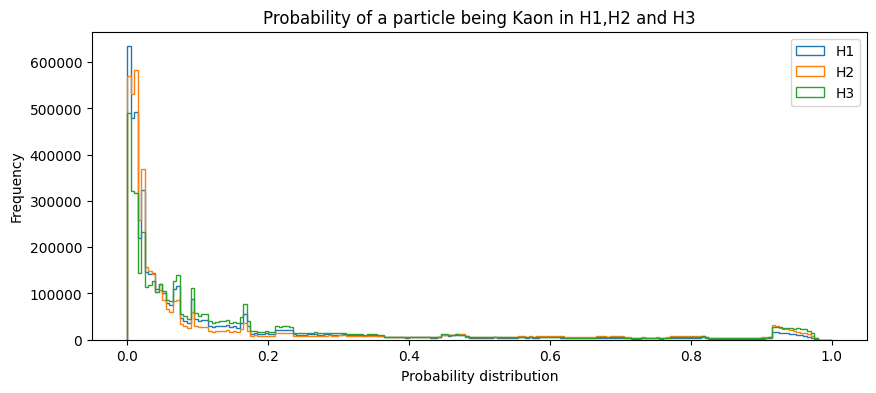

In [12]:
#Make plots of H1/H2/H3 _ProbK on one plot

#accessing the probability values fromt the branches
H1_ProbK = tree["H1_ProbK"].array(library="np")
H2_ProbK = tree["H2_ProbK"].array(library="np")
H3_ProbK = tree["H3_ProbK"].array(library="np")

plt.figure(figsize=(10, 4))
plt.hist(H1_ProbK,bins=200,range=(0, 1), histtype="step")
plt.hist(H2_ProbK,bins=200,range=(0, 1), histtype="step")
plt.hist(H3_ProbK,bins=200,range=(0, 1), histtype="step")
plt.legend(["H1", "H2", "H3"])

plt.xlabel("Probability distribution")
plt.ylabel("Frequency")
plt.title("Probability of a particle being Kaon in H1,H2 and H3")

plt.show()

#in the graph, we can see that for all the daughter particles, that the probability distribution is mostly centered at low values. Therefore, for later selection and since we want the kaons
# we take only those values that have ProbK > 0.8. Like this we include the small peak on the right side of the diagram (high probabilities)


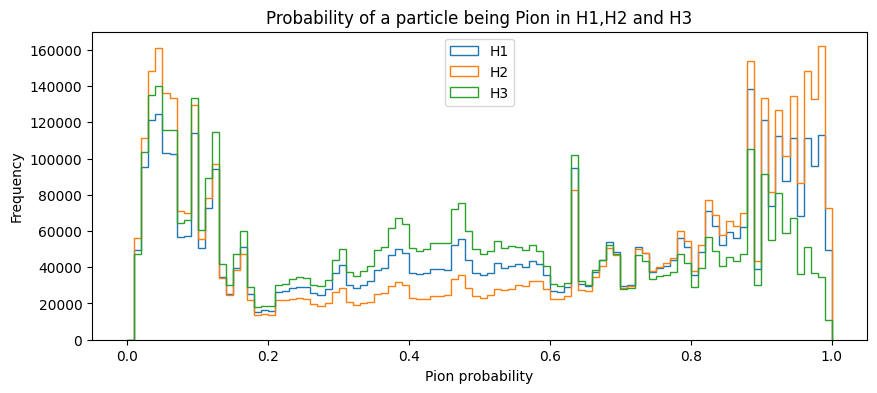

In [13]:
# Do the same for the Probability of being a Pion. Do these distributions match expectations?


#Make plots of H1/H2/H3 _ProbK on one plot
H1_ProbPi= tree["H1_ProbPi"].array(library="np")
H2_ProbPi= tree["H2_ProbPi"].array(library="np")
H3_ProbPi= tree["H3_ProbPi"].array(library="np")

plt.figure(figsize=(10, 4))
plt.hist(H1_ProbPi,bins=100,range=(0, 1), histtype="step")
plt.hist(H2_ProbPi,bins=100,range=(0, 1), histtype="step")
plt.hist(H3_ProbPi,bins=100,range=(0, 1), histtype="step")
plt.legend(["H1", "H2", "H3"])

plt.xlabel("Pion probability")
plt.ylabel("Frequency")
plt.title("Probability of a particle being Pion in H1,H2 and H3")
plt.show()

#making a selection, since we do not want pions, ProbPi < 0.8

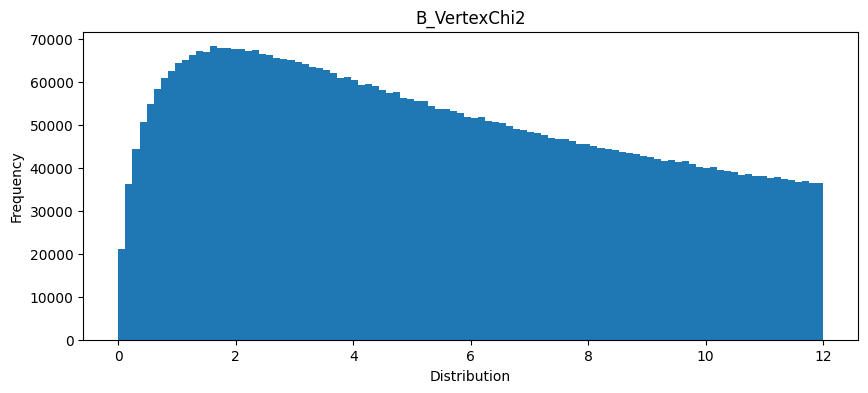

In [14]:
#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2= tree["B_VertexChi2"].array(library="np")

plt.figure(figsize=(10, 4))
plt.hist(B_VertexChi2,bins=100,range=(0, 12), histtype="bar")

plt.xlabel("Distribution")
plt.ylabel("Frequency")
plt.title("B_VertexChi2") #B Vertex higher than 12 is negligible
plt.show()


#Feeling ambitious? Maybe make a 2d plot of Kaon and Pion Prob in a 2 dimensional analysis?
#for each daugther particles

Using these plots, we can now make a preselection string. This is a text string that looks like

In [15]:
print(tree['H2_ProbK'])

<TBranch 'H2_ProbK' at 0x7cd0dffedbe0>


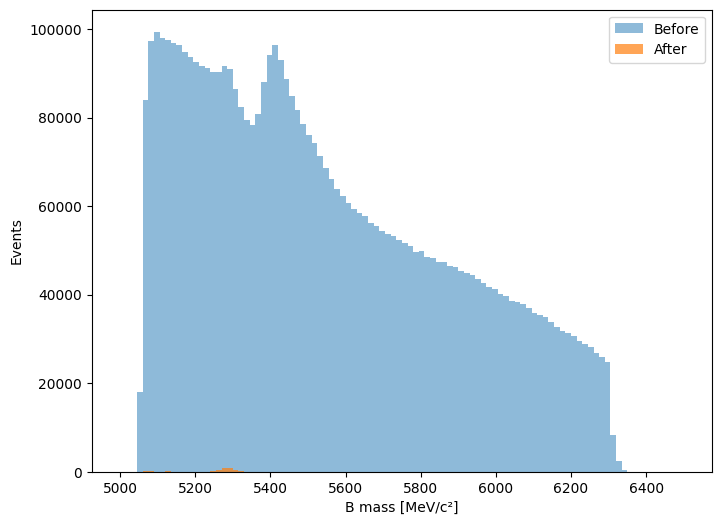

Total events BEFORE cuts:  5,135,823
Total events AFTER  cuts:     3,604
Data kept:                     0.1%
Data thrown away:             99.9%
Reduction factor:           1425.0x


In [16]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)

#making a selection,
H1_isMuon= tree["H1_isMuon"].array(library="np")
H2_isMuon= tree["H2_isMuon"].array(library="np")
H3_isMuon= tree["H3_isMuon"].array(library="np")

selection = np.where((H1_ProbK > 0.8) &
             (H2_ProbK > 0.7) &
             (H3_ProbK > 0.7) &
             (H1_ProbPi < 0.2) &
             (H2_ProbPi < 0.2) &
             (H3_ProbPi < 0.2) &
             (H1_isMuon == 0) &
             (H2_isMuon == 0) &
             (H3_isMuon == 0))

#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

#Bmass after selection
Mb_cut = Mb[selection]  # Fixed variable name

# Plot
plt.figure(figsize=(8, 6))
plt.hist(Mb, bins=100, range=(5000, 6500), alpha=0.5, label='Before')  # 4.8-5.5 GeV
plt.hist(Mb_cut, bins=100, range=(5000, 6500), alpha=0.7, label='After')
plt.xlabel('B mass [MeV/c²]')
plt.ylabel('Events')
plt.legend()
plt.show()

#Look at the total number of entries originally and the new number - how much of your data did you throw away? Was this a good idea? :(
#amount of data thrown out and kept
entries_before = len(Mb)
entries_after = len(Mb_cut)
kept_pct = (entries_after / entries_before) * 100
thrown_away_pct = 100 - kept_pct

print(f"Total events BEFORE cuts:  {entries_before:>8,}")
print(f"Total events AFTER  cuts:  {entries_after:>8,}")
print(f"Data kept:                  {kept_pct:>6.1f}%")
print(f"Data thrown away:           {thrown_away_pct:>6.1f}%")
print(f"Reduction factor:           {entries_before/entries_after:>6.1f}x")

#no that was not a good idea, only 0.1% of the data remains



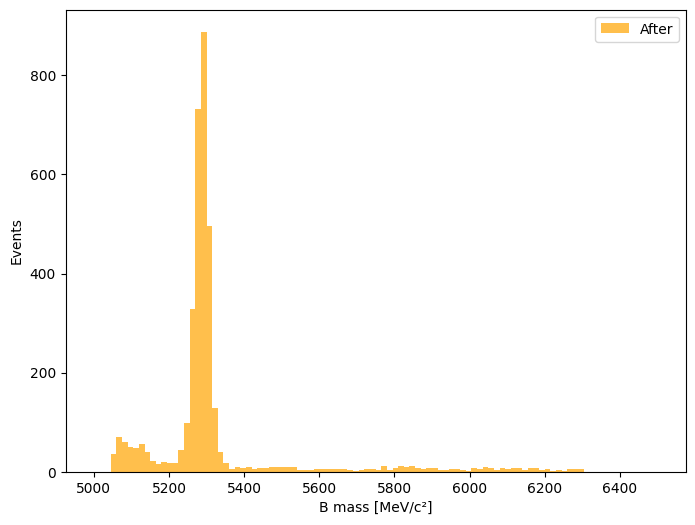

In [17]:
#You can also plot your selected data alone - this shape probably looks quite alot different to your first distribution!
# Plot
plt.figure(figsize=(8, 6))
plt.hist(Mb_cut, bins=100, range=(5000, 6500), alpha=0.7, label='After', color='orange')
plt.xlabel('B mass [MeV/c²]')
plt.ylabel('Events')
plt.legend()
plt.show()

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [18]:
# Probably handy to use a package like lmfit to help us with the models we might want to use, then use scipy to fit

!pip install lmfit
# check out its documentation for what shapes it can handle for you! https://pypi.org/project/lmfit/

# it can do the whole fitting story and output results too :)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.4 MB/s eta 0:00:00


/tmp/ipython-input-153757261.py:26: RuntimeWarning: overflow encountered in exp
  background = B * np.exp(lamb * m)


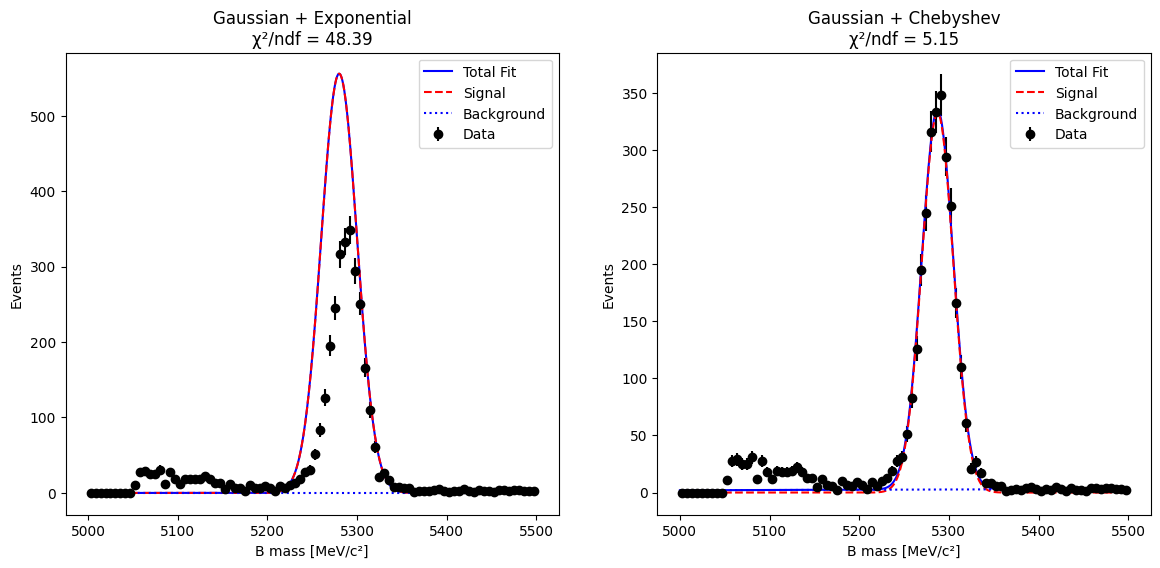

the lower the Chi Square, the better the model for describing the data. Therefore, the Gaussian + Chebyshev models seems more suitble for this data set


In [19]:
#use my example of creating a PDF (far far) above to do a fit to your data. Start with one component, think about making a number 2 component plot - so we have a part for the background and a part for the signal.

# if your cut is very strict above, you may actually get better results by being less strict, give yourself more data and more events to run through the fitting procedure.

from scipy.optimize import curve_fit
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

bins = 90
mass_range = (5000, 5500)

counts, bin_edges = np.histogram(Mb_cut, bins=bins, range=mass_range)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]

# Poisson uncertainties
errors = np.sqrt(counts)
errors[errors == 0] = 1

# two different models are visulized:

# Gaussian + Exponential
def model_exp(m, A, mean, sigma, B, lamb):
    signal = A * np.exp(-(m - mean)**2 / (2 * sigma**2))
    background = B * np.exp(lamb * m)
    return (signal + background) * bin_width

# Gaussian + Chebyshev
def model_cheb(m, A, mean, sigma, c0, c1):
    signal = A * np.exp(-(m - mean)**2 / (2 * sigma**2))
    background = c0 + c1 * (m - 5280)
    return (signal + background) * bin_width

#1st Fit: Exponential background

p0_exp = [100, 5280, 20, 1e-6, -0.001]

params_exp, cov_exp = curve_fit(
    model_exp,
    bin_centers,
    counts,
    p0=p0_exp,
    sigma=errors,
    absolute_sigma=True,
    maxfev=10000
)

A_e, mean_e, sigma_e, B_e, lamb_e = params_exp

expected_exp = model_exp(bin_centers, *params_exp)
chi2_exp = np.sum(((counts - expected_exp) / errors)**2)
ndf_exp = len(counts) - len(params_exp)

# Signal yield (analytic)
nsig_exp = A_e * sigma_e * np.sqrt(2*np.pi)


# 2nd Fit: Chebyshev background

p0_cheb = [100, 5280, 20, 1, 0] #initial

params_cheb, cov_cheb = curve_fit(
    model_cheb,
    bin_centers,
    counts,
    p0=p0_cheb,
    sigma=errors,
    absolute_sigma=True,
    maxfev=10000
)

A_c, mean_c, sigma_c, c0_c, c1_c = params_cheb

expected_cheb = model_cheb(bin_centers, *params_cheb)
chi2_cheb = np.sum(((counts - expected_cheb) / errors)**2) #Chi square: shows how well the model describes the data
ndf_cheb = len(counts) - len(params_cheb)

nsig_cheb = A_c * sigma_c * np.sqrt(2*np.pi)

#Plots

x_plot = np.linspace(*mass_range, 1000)
plt.figure(figsize=(14,6))

# 1st Plot: Exponential background
plt.subplot(1,2,1)

plt.errorbar(bin_centers, counts, yerr=errors,
             fmt='o', color='black', label="Data")

plt.plot(x_plot,
         model_exp(x_plot, *params_exp),
         color='blue', label="Total Fit")

plt.plot(x_plot,
         A_e * np.exp(-(x_plot - mean_e)**2 / (2 * sigma_e**2)) * bin_width,
         color='red', linestyle='--', label="Signal")

plt.plot(x_plot,
         B_e * np.exp(lamb_e * x_plot) * bin_width,
         color='blue', linestyle=':', label="Background")

plt.title(f"Gaussian + Exponential\nχ²/ndf = {chi2_exp/ndf_exp:.2f}")
plt.xlabel("B mass [MeV/c²]")
plt.ylabel("Events")
plt.legend()

# 2nd Plot: Chebyshev background
plt.subplot(1,2,2)

plt.errorbar(bin_centers, counts, yerr=errors,
             fmt='o', color='black', label="Data")

plt.plot(x_plot,
         model_cheb(x_plot, *params_cheb),
         color='blue', label="Total Fit")

plt.plot(x_plot,
         A_c * np.exp(-(x_plot - mean_c)**2 / (2 * sigma_c**2)) * bin_width,
         color='red', linestyle='--', label="Signal")

plt.plot(x_plot,
         (c0_c + c1_c * (x_plot - 5280)) * bin_width,
         color='blue', linestyle=':', label="Background")

plt.title(f"Gaussian + Chebyshev\nχ²/ndf = {chi2_cheb/ndf_cheb:.2f}")
plt.xlabel("B mass [MeV/c²]")
plt.ylabel("Events")
plt.legend()
plt.show()

print("the lower the Chi Square, the better the model for describing the data. Therefore, the Gaussian + Chebyshev models seems more suitble for this data set")

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

You can use the signal shape, the bin widths and the quad from scipy.integrate function to "count" how many events lie under your signal peak,  not including the background events - this is what we actually want.

It will also return to you an error - check in the scipy documentation about what that actually means....

In [24]:
#find the area under your curve(s)! maybe make a pretty little table...
# Gaussian signal for exponential background
def gauss_signal_exp(m, A, mean, sigma, B, lamb):
    return A * np.exp(-(m - mean)**2 / (2 * sigma**2))

# Gaussian signal for Chebyshev background
def gauss_signal_cheb(m, A, mean, sigma, c0, c1):
    return A * np.exp(-(m - mean)**2 / (2 * sigma**2))

# Gaussian + Exponential
signal_area_exp, signal_error_exp = quad(gauss_signal_exp, mass_range[0], mass_range[1], args=(A_e, mean_e, sigma_e, B_e, lamb_e))
signal_area_exp *= bin_width  # account for bin width
#quad calculates the area under the curve between two limits

# Gaussian + Chebyshev
signal_area_cheb, signal_error_cheb = quad(gauss_signal_cheb, mass_range[0], mass_range[1], args=(A_c, mean_c, sigma_c, c0_c, c1_c))
signal_area_cheb *= bin_width

# --- Parameter errors ---
param_err_exp = np.sqrt(np.diag(cov_exp))
param_err_cheb = np.sqrt(np.diag(cov_cheb))

# Extract needed parameters
A_e, mean_e, sigma_e, B_e, lamb_e = params_exp
A_c, mean_c, sigma_c, c0_c, c1_c = params_cheb

dA_e, dmean_e, dsigma_e, dB_e, dlamb_e = param_err_exp
dA_c, dmean_c, dsigma_c, dc0_c, dc1_c = param_err_cheb

# --- Analytic signal yield errors ---
nsig_exp_err = np.sqrt(2*np.pi) * np.sqrt(
    (sigma_e * dA_e)**2 +
    (A_e * dsigma_e)**2
)

nsig_cheb_err = np.sqrt(2*np.pi) * np.sqrt(
    (sigma_c * dA_c)**2 +
    (A_c * dsigma_c)**2
)
import pandas as pd

table = pd.DataFrame({
    "Model": ["Gauss+Exponential", "Gauss+Chebyshev"],
    "Chi2/ndf": [chi2_exp/ndf_exp, chi2_cheb/ndf_cheb],
    "Signal Events (analytic)": [nsig_exp, nsig_cheb],
    "Signal Error (analytic)": [nsig_exp_err, nsig_cheb_err],
    "Signal Events (integrated)": [signal_area_exp, signal_area_cheb],
    "Signal Error (quad)": [signal_error_exp, signal_error_cheb]
})

print(table)

               Model   Chi2/ndf  Signal Events (analytic)  \
0  Gauss+Exponential  48.393214               5013.256549   
1    Gauss+Chebyshev   5.145978               2640.638839   

   Signal Error (analytic)  Signal Events (integrated)  Signal Error (quad)  
0                74.726105                27851.425274         1.319278e-05  
1                77.761941                14670.215773         1.825098e-08  


#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [26]:
#accessing the charge values for each of the daughter particles and putting them in an array

H1_Charge = tree["H1_Charge"].array(library="np")
H2_Charge = tree["H2_Charge"].array(library="np")
H3_Charge = tree["H3_Charge"].array(library="np")



B⁺ events: 1869
B⁻ events: 1735
B⁺ fit: χ²/ndf = 0.83
B⁻ fit: χ²/ndf = 1.16

CP ASYMMETRY RESULT
N(B⁺) = 251 ± 9
N(B⁻) = 220 ± 8

A = -0.0651 ± 0.0459
Significance = 1.42 σ


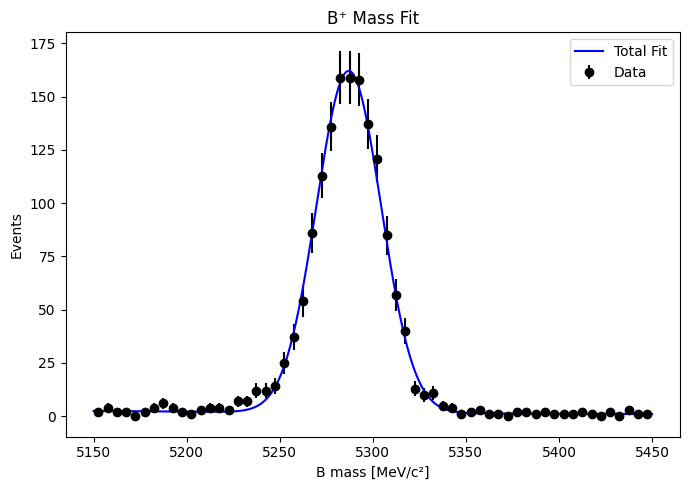

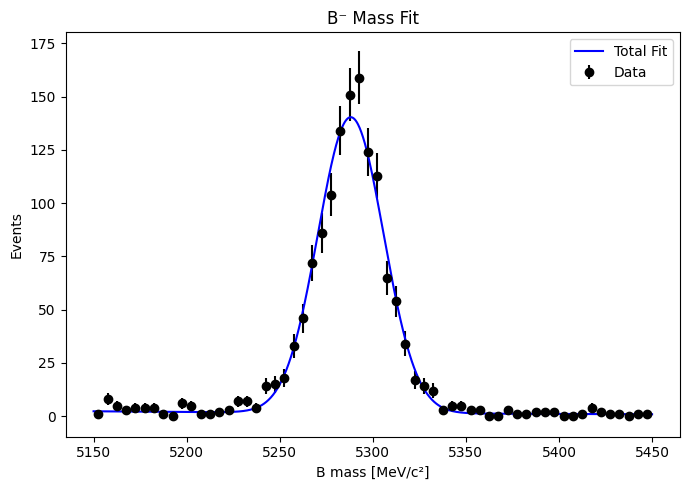

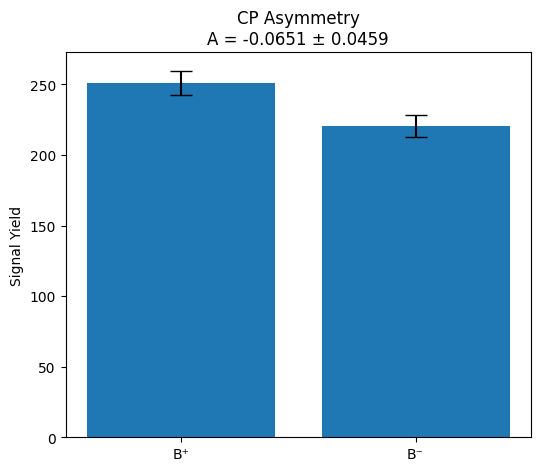

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#  Charge selection, taking only the charge values from the arrays, which are included in the pre-defined selection
#  adding the charges from all the daugther particles

h1_charge_cut = H1_Charge[selection]
h2_charge_cut = H2_Charge[selection]
h3_charge_cut = H3_Charge[selection]
total_charge = h1_charge_cut + h2_charge_cut + h3_charge_cut

# making two groups
Mb_plus  = Mb_cut[total_charge == 1] #all total charges of +1 (B--> K+ K+ K-) are assigned to Mb_plus
Mb_minus = Mb_cut[total_charge == -1] #all total charges of -1 (B--> K- K- K+) are assigned to Mb_minus

print(f"B⁺ events: {len(Mb_plus)}")
print(f"B⁻ events: {len(Mb_minus)}")



# Fitting function

def fit_mass_spectrum(mass_data, label): #function that defines two plots (for B+ and B-)

    bins = 60
    mass_range = (5150, 5450)

    counts, bin_edges = np.histogram(mass_data, bins=bins, range=mass_range)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]

    errors = np.sqrt(counts)
    errors[errors == 0] = 1

    p0 = [max(counts), 5279, 25, 10, -0.001]

    params, cov = curve_fit(
        lambda m, A, mean, sigma, B, lamb:
            model_exp(m, A, mean, sigma, B, lamb) * bin_width,
        bin_centers,
        counts,
        p0=p0,
        sigma=errors,
        absolute_sigma=True,
        maxfev=10000
    )

    A, mean, sigma, B, lamb = params
    param_errs = np.sqrt(np.diag(cov))

    # Analytic Gaussian integral
    signal_yield = A * sigma * np.sqrt(2*np.pi) #number if signal events

    # Approximating error from amplitude only
    signal_error = param_errs[0] * sigma * np.sqrt(2*np.pi)

    chi2 = np.sum(((counts -  #fit quality
                   model_exp(bin_centers, *params)*bin_width)
                   / errors)**2)
    ndf = len(counts) - len(params)

    print(f"{label} fit: χ²/ndf = {chi2/ndf:.2f}")

    return {
        "yield": signal_yield,
        "yield_err": signal_error,
        "params": params,
        "bin_centers": bin_centers,
        "counts": counts,
        "errors": errors,
        "bin_width": bin_width
    }

fit_plus  = fit_mass_spectrum(Mb_plus,  "B⁺")
fit_minus = fit_mass_spectrum(Mb_minus, "B⁻")

N_plus  = fit_plus["yield"]
N_minus = fit_minus["yield"]

N_plus_err  = fit_plus["yield_err"]
N_minus_err = fit_minus["yield_err"]


# defining the CP Asymmetry

def Asymmetry(N_minus, N_plus):
  return (N_minus - N_plus) / (N_minus + N_plus)

def Asymmetry_sigma(A, N_minus, N_plus):
  return np.sqrt((1 - A**2) / (N_minus + N_plus))

A = Asymmetry(N_minus, N_plus)
A_error= Asymmetry_sigma(A, N_minus, N_plus)

print("\n====================================")
print("CP ASYMMETRY RESULT")
print("====================================")
print(f"N(B⁺) = {N_plus:.0f} ± {N_plus_err:.0f}")
print(f"N(B⁻) = {N_minus:.0f} ± {N_minus_err:.0f}")
print(f"\nA = {A:.4f} ± {A_error:.4f}")
print(f"Significance = {abs(A)/A_error:.2f} σ")
print("====================================")



#  Plot mass fits

def plot_fit(fit_result, title):

    x_plot = np.linspace(5150, 5450, 1000)
    A, mean, sigma, B, lamb = fit_result["params"]
    bin_width = fit_result["bin_width"]

    plt.figure(figsize=(7,5))

    plt.errorbar(fit_result["bin_centers"],
                 fit_result["counts"],
                 yerr=fit_result["errors"],
                 fmt='o', color='black', label="Data")

    plt.plot(x_plot,
             model_exp(x_plot, *fit_result["params"]) * bin_width,
             color='blue', label="Total Fit")

    plt.xlabel("B mass [MeV/c²]")
    plt.ylabel("Events")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_fit(fit_plus,  "B⁺ Mass Fit")
plot_fit(fit_minus, "B⁻ Mass Fit")


#  Bar plot of yields

plt.figure(figsize=(6,5))
labels = ['B⁺', 'B⁻']
yields = [N_plus, N_minus]
yerrs = [N_plus_err, N_minus_err]

plt.bar(labels, yields, yerr=yerrs, capsize=8)
plt.ylabel("Signal Yield")
plt.title(f"CP Asymmetry\nA = {A:.4f} ± {A_error:.4f}")
plt.show()

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)